In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import BaseMessage, AIMessage, SystemMessage, HumanMessage
from langchain_core.prompts import PromptTemplate
from langgraph.graph import StateGraph, START, END 
from langgraph.graph.message import add_messages
from typing import Literal, Dict, Annotated, List
from pydantic import BaseModel, Field
from dotenv import load_dotenv

In [3]:
COMMON_LLM = "gemini-2.5-flash"

In [4]:
load_dotenv()

True

In [5]:
llm = ChatGoogleGenerativeAI(
    model = COMMON_LLM,
    max_tokens = 4096,
    verbose = False,
    temperature = 0.5
)

In [6]:
class PodAgentSchema(BaseModel):

    messages: Annotated[List[BaseMessage], add_messages]

In [14]:
def agent_node(state: PodAgentSchema):

    messages = state.model_dump()['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [15]:
# graph

workflow = StateGraph(PodAgentSchema)


# nodes 
workflow.add_node("agent", agent_node)

# edges 
workflow.add_edge(START, "agent")
workflow.add_edge("agent", END)

podagent = workflow.compile()

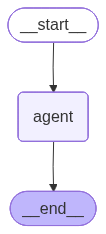

In [16]:
podagent

In [25]:
config = {'configurable': {'thread_id':'thread-1'}}

In [28]:
prompt = "who am i"
initial_state = PodAgentSchema(messages=[HumanMessage(content=prompt)], config=config)
# print(type(initial_state))
response = podagent.invoke(initial_state)

In [29]:
response['messages']

[HumanMessage(content='who am i', additional_kwargs={}, response_metadata={}, id='ccb6caae-9153-4e5c-9a30-bfa58152c63d'),
 AIMessage(content='That\'s a profound question! As an AI, I don\'t have access to your personal identity, memories, experiences, or consciousness, so I can\'t tell you who you are in a personal sense.\n\nOnly you can truly answer that question for yourself.\n\nHowever, I can offer some frameworks people often use to define "who they are":\n\n1.  **Your Personal Details:** Your name, age, where you live, your family, your background.\n2.  **Your Experiences:** The sum of everything you\'ve lived through, the lessons you\'ve learned, your memories, both good and bad.\n3.  **Your Values and Beliefs:** What you hold to be important, your moral compass, your worldview, what you stand for.\n4.  **Your Passions and Interests:** What excites you, what you love to do, your hobbies, your curiosities.\n5.  **Your Relationships:** How you connect with others, your roles as a f